In [3]:
# Install YOLOv8 from Ultralytics
!pip install ultralytics


In [ ]:
!start labelstudio

: 

In [2]:
import os
import json
import pandas as pd

c:\Users\soura\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
det = 'https://bj.bcebos.com/paddlex/examples/meter_reader/datasets/meter_det.tar.gz'

if ('meter_seg' not in os.listdir()):
    for i in [det]:
        !wget $i
        dir_name = i.split('/')[-1]
        !tar -xf $dir_name
else:
    print('Directory already exist')

In [4]:
import os
import json
import pandas as pd

# Define class mapping (update if you have multiple classes)
class_map = {'meter': 0}

# Function to convert bbox to YOLO format
def convert_bbox_to_yolo(bbox, img_width, img_height):
    x, y, w, h = bbox
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height
    return [x_center, y_center, width, height]

# Process annotations for train/test datasets
for name in ['test', 'train']:
    with open(f'meter_det/annotations/instance_{name}.json') as file:
        annotations = json.load(file)

    images = annotations['images']
    annotation = annotations['annotations']

    # Create mapping for image metadata
    img_datas = {i['id']: [i['file_name'], i['width'], i['height']] for i in images}

    # Group bbox annotations by image
    bboxs = {}
    for i in annotation:
        img_id = i['image_id']
        if img_id not in bboxs:
            bboxs[img_id] = [i['bbox']]
        else:
            bboxs[img_id].append(i['bbox'])

    # Generate YOLO-format labels
    for img_id, bboxes in bboxs.items():
        file_name, width, height = img_datas[img_id]
        txt_file_path = f"meter_det/{name}/labels/{os.path.splitext(file_name)[0]}.txt"

        os.makedirs(os.path.dirname(txt_file_path), exist_ok=True)
        with open(txt_file_path, 'w') as label_file:
            for bbox in bboxes:
                yolo_bbox = convert_bbox_to_yolo(bbox, width, height)
                label_file.write(f"{class_map['meter']} " + " ".join(map(str, yolo_bbox)) + "\n")

    print(f"Processed {name} dataset.")


Processed test dataset.
Processed train dataset.


In [2]:
!yolo task=detect mode=train model=best.pt data=data.yaml epochs=50 imgsz=640

New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.59 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=best.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

Traceback (most recent call last):
  File "c:\Users\soura\anaconda3\Lib\site-packages\ultralytics\engine\trainer.py", line 562, in get_dataset
    data = check_det_dataset(self.args.data)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\soura\anaconda3\Lib\site-packages\ultralytics\data\utils.py", line 378, in check_det_dataset
    raise FileNotFoundError(m)
FileNotFoundError: 
Dataset 'data.yaml' images not found ⚠️, missing path 'C:\Users\soura\GSoC23-OpenVINO\Model-training\training-notebooks\dataset\val\images'
Note dataset download directory is 'C:\Users\soura\GSoC23-OpenVINO\Model-training\training-notebooks'. You can update this in 'C:\Users\soura\AppData\Roaming\Ultralytics\settings.json'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\soura\anaconda3\Scripts\yolo.exe\__main__.py", line 7

In [2]:
import os

# Define paths
images_dir = 'meter_det/train/images'  # Update with your images path
labels_dir = 'meter_det/train/labels'  # Update with your labels path

# Validate labels
for image_file in os.listdir(images_dir):
    image_name, _ = os.path.splitext(image_file)
    label_file = f"{image_name}.txt"
    label_path = os.path.join(labels_dir, label_file)
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            if len(lines) == 0:
                print(f"Empty label file: {label_path}")
            else:
                print(f"Valid labels found for {image_file}")
    else:
        print(f"Missing label file for {image_file}")

Valid labels found for 20190822_1.jpg
Valid labels found for 20190822_10.jpg
Valid labels found for 20190822_101.jpg
Valid labels found for 20190822_102.jpg
Valid labels found for 20190822_104.jpg
Valid labels found for 20190822_106.jpg
Valid labels found for 20190822_107.jpg
Valid labels found for 20190822_108.jpg
Valid labels found for 20190822_109.jpg
Valid labels found for 20190822_11.jpg
Valid labels found for 20190822_111.jpg
Valid labels found for 20190822_112.jpg
Valid labels found for 20190822_113.jpg
Valid labels found for 20190822_114.jpg
Valid labels found for 20190822_115.jpg
Valid labels found for 20190822_116.jpg
Valid labels found for 20190822_117.jpg
Valid labels found for 20190822_118.jpg
Valid labels found for 20190822_119.jpg
Valid labels found for 20190822_12.jpg
Valid labels found for 20190822_120.jpg
Valid labels found for 20190822_121.jpg
Valid labels found for 20190822_122.jpg
Valid labels found for 20190822_125.jpg
Valid labels found for 20190822_126.jpg
Valid

## OCR Confi && yolo

In [38]:

import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
model = YOLO("Models/model_1_0_2.pt")
reader = easyocr.Reader(['en'])

from typing import Dict, Any
def detect_and_recognize(image_path: str) -> Dict[str, Dict[str, Any]]:
    results = model.predict(source=image_path, conf=0.15, save=False)
    output = {}
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for result in results:
        for box in result.boxes:
            # Extract detection info
            x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
            class_id = int(box.cls)
            class_name = result.names[class_id]
            yolo_conf = box.conf.item()

            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
            cv2.putText(image_rgb, f"{class_name} {yolo_conf:.2f}",
                        (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            # Process image region
            image = cv2.imread(image_path)
            cropped = image[y_min:y_max, x_min:x_max]
            ocr_results = reader.readtext(cropped)
            ocr_boxes = [detection[0] for detection in ocr_results]
            # _, text, conf = box
            print(result.names[class_id] , box.conf)
            # Print OCR confidence for each detected text
            for detection in ocr_results:
                ocr_text = detection[1]
                ocr_confidence = detection[2]
                print(f"OCR Text: {ocr_text}, Confidence: {ocr_confidence}")


detect_and_recognize('testimg/images/23.jpeg')


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



image 1/1 c:\Users\soura\Downloads\ML-Model\testimg\images\23.jpeg: 480x640 1 kv, 1 TimeLeft, 65.3ms
Speed: 2.0ms preprocess, 65.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
TimeLeft tensor([0.9297])
OCR Text: Tmer, Confidence: 0.17520716381281926
OCR Text: TimeLeft, Confidence: 0.9970262245435698
OCR Text: Oooo:05.00, Confidence: 0.13130057071959095
kv tensor([0.8708])
OCR Text: High, Confidence: 0.9999983906745911
OCR Text: 0.05, Confidence: 0.9999881982803345
OCR Text: kV, Confidence: 0.9731034516254133
OCR Text: Volt, Confidence: 0.9999270439147949


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



image 1/1 c:\Users\soura\Downloads\ML-Model\testimg\images\1.png: 480x640 1 qcValue, 123.9ms
Speed: 4.8ms preprocess, 123.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
YOLO Class: qcValue, YOLO Confidence: 0.97
OCR Text: 30KC, OCR Confidence: 0.16


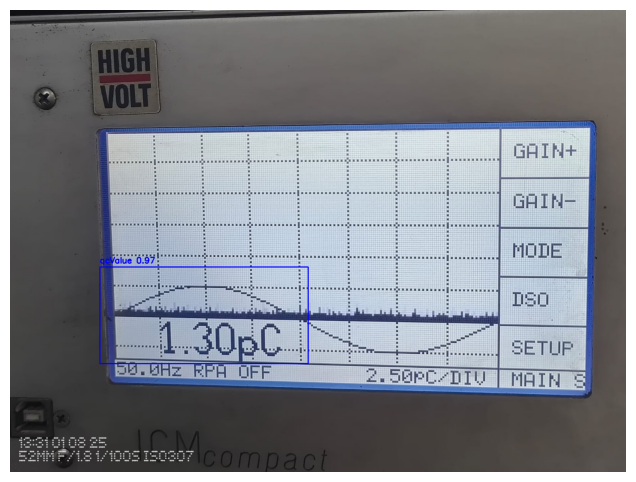

{}

In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
import matplotlib.pyplot as plt

# Load YOLOv8 model and EasyOCR reader
model = YOLO("Models/model_1_0_2.pt")
reader = easyocr.Reader(['en'])

from typing import Dict, Any

def detect_and_recognize(image_path: str) -> Dict[str, Dict[str, Any]]:
    results = model.predict(source=image_path, conf=0.15, save=False)
    output = {}

    # Load the image to draw bounding boxes
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with Matplotlib

    for result in results:
        for box in result.boxes:
            # Extract detection info
            x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
            class_id = int(box.cls)
            class_name = result.names[class_id]
            yolo_conf = box.conf.item()  # YOLO confidence

            # Process image region for OCR
            cropped = image[y_min:y_max, x_min:x_max]
            ocr_results = reader.readtext(cropped)
            
            # Draw bounding box on the image
            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
            cv2.putText(image_rgb, f"{class_name} {yolo_conf:.2f}",
                        (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            # Print YOLO class and confidence
            print(f"YOLO Class: {class_name}, YOLO Confidence: {yolo_conf:.2f}")

            # Process OCR results for each bounding box
            for detection in ocr_results:
                ocr_text = detection[1]
                ocr_confidence = detection[2]
                # Print OCR text and confidence
                print(f"OCR Text: {ocr_text}, OCR Confidence: {ocr_confidence:.2f}")

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

    return output

# Test the function
detect_and_recognize('testimg/images/1.png')


## Custom OCR Model 

In [20]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  
model.train(data='data.yaml', epochs=50, imgsz=640)


KeyboardInterrupt: 


0: 640x640 3 1s, 1 3, 1 4, 1 7, 148.0ms
Speed: 9.8ms preprocess, 148.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Detected Bboxes with Class IDs and Confidence:
Class ID: 4, Bbox: [319, 127, 360, 256], Confidence: 0.90
Class ID: 1, Bbox: [293, 127, 327, 251], Confidence: 0.87
Class ID: 1, Bbox: [250, 75, 297, 250], Confidence: 0.86
Class ID: 8, Bbox: [121, 208, 138, 260], Confidence: 0.85
Class ID: 3, Bbox: [83, 186, 110, 267], Confidence: 0.73
Class ID: 1, Bbox: [106, 209, 124, 263], Confidence: 0.65


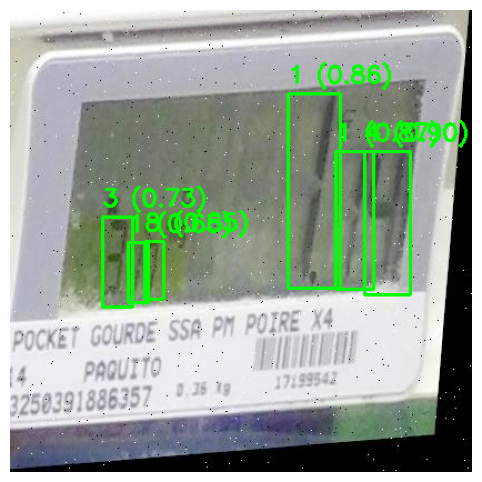

Formatted Number: 318 114


In [9]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your trained YOLOv8 model
model = YOLO("Models/ocr-best.pt")

def detect_and_sort_digits(image_path, show_bboxes=True, gap_multiplier=1.5):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)

    # Extract bounding boxes
    bboxes = []
    boxes = results[0].boxes
    for box, conf, cls in zip(boxes.xyxy, boxes.conf, boxes.cls):
        x_min = int(box[0].item())
        y_min = int(box[1].item())
        x_max = int(box[2].item())
        y_max = int(box[3].item())
        confidence = float(conf.item())
        class_id = int(cls.item())
        if class_id != 10:  # Assuming class 10 is dot ('.')
            bboxes.append([x_min, y_min, x_max, y_max, confidence, class_id])

    # Print the class labels (IDs) and bounding boxes
    print("Detected Bboxes with Class IDs and Confidence:")
    for bbox in bboxes:
        print(f"Class ID: {bbox[5]}, Bbox: {bbox[:4]}, Confidence: {bbox[4]:.2f}")
    
    if show_bboxes:
        for bbox in bboxes:
            x_min, y_min, x_max, y_max, conf, label = bbox
            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image_rgb, 
                        f"{label} ({conf:.2f})",
                        (x_min, y_min - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.7, 
                        (0, 255, 0), 
                        2)

        plt.figure(figsize=(10, 6))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

    digit_sequence = sort_and_extract_digits(bboxes, gap_multiplier)
    
    return digit_sequence

def sort_and_extract_digits(bboxes, gap_multiplier=1.5):
    if not bboxes:
        return ""
    
    # Sort by horizontal position
    sorted_bboxes = sorted(bboxes, key=lambda b: (b[0] + b[2])/2)
    avg_width = sum(b[2]-b[0] for b in sorted_bboxes)/len(sorted_bboxes)
    gap_threshold = avg_width * gap_multiplier
    
    # Group digits based on x-axis gaps
    groups = []
    current_group = [sorted_bboxes[0]]
    
    for bbox in sorted_bboxes[1:]:
        last_bbox = current_group[-1]
        gap = bbox[0] - last_bbox[2] 
        
        if gap > gap_threshold:
            groups.append(current_group)
            current_group = [bbox]
        else:
            current_group.append(bbox)
    
    groups.append(current_group)  
    return " ".join(["".join(str(b[5]) for b in group) for group in groups])

# Test with an example
image_path = 'testimg/ok/7.jpg'
result = detect_and_sort_digits(image_path, gap_multiplier=1.5)
print(f"Formatted Number: {result}")
